<a href="https://colab.research.google.com/github/fbasatemur/FFT-Variance_ANN_with_CUDA_CPP/blob/master/FFT_Variance_ANN_Tasarim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Oct 24 15:46:07 2020

@author: fbasatemur
"""

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.losses import SparseCategoricalCrossentropy
from keras.models import model_from_json
from keras.models import load_model
from keras import layers, activations
from matplotlib import pyplot as plt


 
#%% ANN model
def createModel():
      
      model = Sequential()
      
      model.add(Dense(100, activation="relu", input_shape=(625,)))  # 25x25 FFT
      model.add(BatchNormalization()) 
      
      model.add(Dense(100, activation="relu"))
      model.add(BatchNormalization())
      
      model.add(Dense(100, activation="relu"))
      model.add(BatchNormalization())
      
      model.add(Dense(100, activation="relu"))
      model.add(BatchNormalization())
      
      model.add(Dense(100, activation="relu"))
      model.add(BatchNormalization())
      
      model.add(Dense(100, activation="relu"))
      model.add(BatchNormalization())

      model.add(Dense(100, activation="relu"))
      model.add(BatchNormalization())
      
      model.add(Dense(20, activation="relu"))
      model.add(BatchNormalization())
      
      model.add(Dense(1, activation="sigmoid"))   # unipolar sigmoid (0-1)
      
      model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae'])
      
      return model

def showAccuracy(history):
      
      for key in history.history.keys():  
            plt.plot(history.history[key], label = key)
    
      plt.xlabel("epochs")
      plt.ylabel("values")
      
      plt.legend()
      plt.show() 
      



In [ ]:
# drive access

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
#%% read file 

import numpy as np

fftValues = []
varianceValues = []
imagePaths = []

# drive_path_FFT = "drive/My Drive/Colab Notebooks/FFT_Variance_ANN_Tasarim_Donemi/25_NORM_FFT.txt" 
# drive_path_VAR = "drive/My Drive/Colab Notebooks/FFT_Variance_ANN_Tasarim_Donemi/100_Variance.txt" 
# drive_path_IMGPATHS = "drive/My Drive/Colab Notebooks/FFT_Variance_ANN_Tasarim_Donemi/Image_Paths.txt" 

drive_path_FFT = "drive/My Drive/Colab Notebooks/FFT_Variance_ANN_Tasarim_Donemi/25_NORM_FFT.txt" 
drive_path_VAR = "drive/My Drive/Colab Notebooks/FFT_Variance_ANN_Tasarim_Donemi/Variance.txt" 
drive_path_IMGPATHS = "drive/My Drive/Colab Notebooks/FFT_Variance_ANN_Tasarim_Donemi/Image_Paths.txt" 

with open(drive_path_FFT, "r") as fileFFT:
    fftValues = [line.split() for line in fileFFT]

with open(drive_path_VAR, "r") as fileVar:
    for line in fileVar:
        varianceValues.append(line.split()[0])

with open(drive_path_IMGPATHS, "r") as filePaths:
    for line in filePaths:
        imagePaths.append(line.split('\\')[-1])

fileFFT.close()
fileVar.close()
filePaths.close()

fftValues = np.array(fftValues)                          
fftValues = fftValues.astype('float')

varianceValues = np.array(varianceValues)                          
varianceValues = varianceValues.astype('float')

filePaths = np.array(filePaths)


In [ ]:
print(type(fftValues[0][0]))

<class 'numpy.float64'>


In [ ]:
#%% varianceValues tags
# varianceValues labeled with images index

labeledVarianceData = np.arange(len(varianceValues))
labeledVarianceData = np.vstack((varianceValues, labeledVarianceData)).T

In [ ]:
#%% 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(fftValues, labeledVarianceData, test_size=0.1, random_state=0)

print("Total images: " + str(len(varianceValues)))
print("Total train images: " + str(y_train.T[0].shape[0]))
print("Total test images: " + str(y_test.T[0].shape[0]))


Total images: 771
Total train images: 693
Total test images: 78


In [ ]:
#%%

model = createModel()
history = model.fit(x_train, y_train.T[0], epochs=1000, batch_size=25)


Epoch 1/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0797 - mae: 0.2193
Epoch 2/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0364 - mae: 0.1475
Epoch 3/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0229 - mae: 0.1171
Epoch 4/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0179 - mae: 0.1031
Epoch 5/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0133 - mae: 0.0885
Epoch 6/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0132 - mae: 0.0873
Epoch 7/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0106 - mae: 0.0803
Epoch 8/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0096 - mae: 0.0753
Epoch 9/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0091 - mae: 0.0733
Epoch 10/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0089 - mae: 0.0742
Epoch 11/1000
28/28 [============================

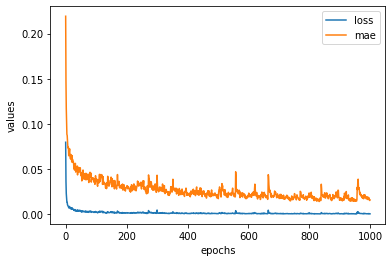

3/3 [==============================] - 0s 3ms/step - loss: 0.0018 - mae: 0.0325
[0.0017872523749247193, 0.03252248093485832]
 ----Predict----      -------Real-------    -----Images Tags - Paths----- 
0 : [0.61262256]              0.6             681 - test7_205.bmp

1 : [0.11936939]              0.1             764 - test7_288.bmp

2 : [0.87347037]              0.85             214 - 10X80_63.bmp

3 : [0.2379711]              0.25             14 - 10X70_14.bmp

4 : [0.69830555]              0.7             187 - 10X80_36.bmp

5 : [0.11160514]              0.1             761 - test7_285.bmp

6 : [0.6892598]              0.7             79 - 10X70_79.bmp

7 : [0.586354]              0.6             680 - test7_204.bmp

8 : [0.8329718]              0.9             643 - test7_167.bmp

9 : [0.52501816]              0.5             531 - test7_55.bmp

10 : [0.33242023]              0.35             31 - 10X70_31.bmp

11 : [0.8961382]              0.9             235 - 10X80_84.bmp

12 : [0

In [ ]:
#%%

showAccuracy(history)
print(model.evaluate(x_test, y_test.T[0]))

#%% y_test_predict print

y_test_predict = model.predict(x_test)

print(" ----Predict----      -------Real-------    -----Images Tags - Paths----- ")
for i in range(len(y_test_predict)):
      print( str(i) + " : "+ str(y_test_predict[i]) + "              " + str(y_test.T[0][i]) + "             " + str(int(y_test.T[1][i])) + " - " + imagePaths[int(y_test.T[1][i])])


In [ ]:
#%% model save .json

model_json = model.to_json()

with open("drive/My Drive/Colab Notebooks/FFT_Variance_ANN_Tasarim_Donemi/model_100_25_FFT.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("drive/My Drive/Colab Notebooks/FFT_Variance_ANN_Tasarim_Donemi/model_100_25_FFT.h5")



In [ ]:
#%% model load

json_file = open('drive/My Drive/Colab Notebooks/FFT_Variance_ANN_Tasarim_Donemi/model_100_25_FFT.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("drive/My Drive/Colab Notebooks/FFT_Variance_ANN_Tasarim_Donemi/model_100_25_FFT.h5")


In [ ]:

#%% loaded_model predict

loaded_model_predict = loaded_model.predict(x_test)

print(" ----Predict----      -------Real-------    -----Images Tags - Paths----- ")
for i in range(len(loaded_model_predict)):
     print( str(i) + " : "+ str(loaded_model_predict[i]) + "      " + str(y_test.T[0][i]) + "         " + str(int(y_test.T[1][i])) + " - " + imagePaths[int(y_test.T[1][i])])


#%% print min and max values

print("Min value:" + str(np.amin(loaded_model_predict)) + " index: " + str(np.argmin(loaded_model_predict, axis=0)))
print("Max value:" + str(np.amax(loaded_model_predict)) + " index: " + str(np.argmax(loaded_model_predict, axis=0)))

 ----Predict----      -------Real-------    -----Images Tags - Paths----- 
0 : [0.61262256]      0.6         681 - test7_205.bmp

1 : [0.11936939]      0.1         764 - test7_288.bmp

2 : [0.8734704]      0.85         214 - 10X80_63.bmp

3 : [0.23797113]      0.25         14 - 10X70_14.bmp

4 : [0.69830555]      0.7         187 - 10X80_36.bmp

5 : [0.11160514]      0.1         761 - test7_285.bmp

6 : [0.6892598]      0.7         79 - 10X70_79.bmp

7 : [0.586354]      0.6         680 - test7_204.bmp

8 : [0.83297193]      0.9         643 - test7_167.bmp

9 : [0.52501816]      0.5         531 - test7_55.bmp

10 : [0.33242023]      0.35         31 - 10X70_31.bmp

11 : [0.8961381]      0.9         235 - 10X80_84.bmp

12 : [0.9191019]      0.9         392 - 20X80_51.bmp

13 : [0.85558033]      0.85         583 - test7_107.bmp

14 : [0.14860907]      0.15         739 - test7_263.bmp

15 : [0.81825924]      0.8         204 - 10X80_53.bmp

16 : [0.7179094]      0.75         85 - 10X70_85.bmp